# Data Preparation

In [99]:
# import necessary libraries to get the data
import requests
import html5lib
from bs4 import BeautifulSoup as bs
from nltk.tokenize import sent_tokenize
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# in case we need to download NLTK punctuations
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df_bow_who = pd.read_csv("/content/drive/MyDrive/NER_V2.2/NER_v2.2/dataset_ner/df_train.csv")
df_bow_who.head()

,title,date,description,source
0,\n Akhir Tragis Dini Nurdiani Dilaporka...,"Sabtu, 14 Mei 2022 22:15 WIB",warga cengkareng jakarta barat dinyatakan tewa...,www.detik.com
1,"\n Sempat Diduga Salah Tangkap, 4 Terda...","Senin, 25 Apr 2022 15:27 WIB",terdakwa terdakwa fikry abdul rohman randy apr...,www.detik.com
2,\n Ulah Haji Gadungan di Makassar Curi ...,"Jumat, 25 Mar 2022 07:00 WIB",basri haji gadungan ditangkap polisi wilayah b...,www.detik.com
3,\n Kasus Narkotika dan Asusila Libatkan...,"Rabu, 06 Apr 2022 09:19 WIB",ketua pn bengkulu jon sarman saragih perkara p...,www.detik.com
4,\n Rampok-Paksa Wanita Buka Baju Modus ...,"Kamis, 02 Des 2021 11:56 WIB",wanita labuhanbatu utara labura sumatera utara...,www.detik.com


In [ ]:
bow_list_who = []

for i in range(0, df_bow_who.shape[0]):
  bow_list_who.append(df_bow_who.iloc[i, 2])

print({
      'Who': len(bow_list_who)
})

{'Who': 1825}


In [ ]:
bow_list_who

['warga cengkareng jakarta barat dinyatakan tewas dibunuh polisi mencocokkan identitas sesosok mayat perempuan ditemukan jatisampurna bekasi jumat 295 minggu dinyatakan hilang polisi menangkap pelaku penemuan jasad perempuan jatisampurna bekasi keluarga melapor polisi harapan ditemukan sisi keluarga berikhtiar ikhtiar mencari manamana tangerang wanita riyan keluarga nggak amanaman',
 'terdakwa terdakwa fikry abdul rohman randy apriyanto muhammad rizky sidang keempatnya digelar pengadilan negeri cikarang mengadili terdakwa terbukti sadar bersalah tindakan pidana pencurian tindakan kekerasan dakwaan penuntut hakim ketua chandra ramadhani membacakan vonis pn cikarang bekasi senin 2542022 hakim menjatuhkan putusan abdurrahman pidana penjara 10 terdakwa dijatuhi vonis penjara menjatuhkan pidana terdakwa fikri randy rizky pidana masingmasing sambung hakim hakim membacakan putusan keluarga terdakwa menahan air dibacakan vonis keluarga kecewa ruangan sidang jaksa menuntut muhammad fikry muhamm

In [ ]:
# link = 'https://20.detik.com/detikflash/20220411-220411115/kronologi-anak-dprd-kebumen-tewas-dihantam-gir-di-jogja' #'https://republika.co.id/berita/qcsbt4383/akhlak-sebagai-emcore-valueem-bumn-erick-thohir-bismillah' #'https://ekonomi-islam.com/tag/teori-teori-ekonomi-islam/'
# req = requests.get(link)
# soup = bs(req.content, 'html5lib')

In [ ]:
# paragraphs = soup.findAll('p')
# # paragraphs = "kawanan pencuri tepergok warga tersangka polsek bojongsari pelaku orang tertangkap berhasil kabur rangga pemilik studio foto dihubungi minggu rangga menceritakan gerak gerik maling studio dicurigai salah teman pulang salat jumat kabar rangga mengirim sepupu tinggal lokasi orang motor studio rolling door terbuka ditutupi karangan bunga sambung rangga sang sepupu menegur sontak orang studio ketakutan orang pelaku berhasil melarikan orang studio berhasil kabur temannya motor menyeret orang studio berhasil tertangkap diteriaki maling sepupu menduga komplotan alat pembobol menurutnya alat berbentuk kunci t pelaku ditangkap mengaku tinggal tangerang berusia polisi suruh proses nggak tega pelaku tua umurnya rangga akibat aksi pembobolan pintu studio rusak barang berantakan alhamdulillah barang"

In [ ]:
# text = []
# for p in paragraphs:
#   # text.append(paragraphs)
#   text.append(p.text)

In [ ]:
# text

['Polda DIY berhasil meringkus lima tersangka kasus penganiayaan di Jalan Gedongkuning, Kotagede, Yogyakarta, Minggu (3/4). Salah satu tersangka membuat korban bernama Daffa Adzin Albazith tewas karena sabetan gir.']

# Data Preprocessing

In [106]:
text_ready = ' '.join(bow_list_who[0:7])

In [107]:
text_ready

'warga cengkareng jakarta barat dinyatakan tewas dibunuh polisi mencocokkan identitas sesosok mayat perempuan ditemukan jatisampurna bekasi jumat 295 minggu dinyatakan hilang polisi menangkap pelaku penemuan jasad perempuan jatisampurna bekasi keluarga melapor polisi harapan ditemukan sisi keluarga berikhtiar ikhtiar mencari manamana tangerang wanita riyan keluarga nggak amanaman terdakwa terdakwa fikry abdul rohman randy apriyanto muhammad rizky sidang keempatnya digelar pengadilan negeri cikarang mengadili terdakwa terbukti sadar bersalah tindakan pidana pencurian tindakan kekerasan dakwaan penuntut hakim ketua chandra ramadhani membacakan vonis pn cikarang bekasi senin 2542022 hakim menjatuhkan putusan abdurrahman pidana penjara 10 terdakwa dijatuhi vonis penjara menjatuhkan pidana terdakwa fikri randy rizky pidana masingmasing sambung hakim hakim membacakan putusan keluarga terdakwa menahan air dibacakan vonis keluarga kecewa ruangan sidang jaksa menuntut muhammad fikry muhammad ri

# Labelling

In [108]:
annotations = sorted(['nama'
            #    'tanggal',
              #  'hari',
              #  'lokasi'
            #    'organisasi',
               ])
annotations

['nama']

In [109]:
# install Sastrawi
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
from BIOtagging import text_to_tagReadyDF, convert_to_spaCyformat

In [112]:
tagready_df = text_to_tagReadyDF(pd.Series([text_ready]), isCSV=False)

1it [00:00,  3.70it/s]


In [113]:
print(tagready_df.shape)
tagready_df.head()

(1381, 2)


,token_0,BIO_tag_0
0,warga,
1,,O
2,cengkareng,
3,,O
4,jakarta,


In [114]:
link_for_save = "/content/drive/MyDrive/NER_V2.2/NER_v2.2/text_tagged.csv"
tagready_df.to_csv(link_for_save, index=False)
tagready_df

,token_0,BIO_tag_0
0,warga,
1,,O
2,cengkareng,
3,,O
4,jakarta,
...,...,...
1376,menepikan,
1377,,O
1378,kendaraan,
1379,,O


hasil text_tagged.csv ku tagging manual di excel. b- (beginning), i- (inside), e- (end)

In [115]:
# import BIO-tagged csv file
link_BIOtagged_file = "/content/drive/MyDrive/NER_V2.2/NER_v2.2/text_tagged_done.csv"
df_tagged = pd.read_csv(link_BIOtagged_file)

In [116]:
print(df_tagged.shape)
df_tagged

(1381, 2)


,token_0,BIO_tag_0
0,warga,o
1,,O
2,cengkareng,o
3,,O
4,jakarta,o
...,...,...
1376,menepikan,o
1377,,O
1378,kendaraan,o
1379,,O


In [117]:
train_data = convert_to_spaCyformat(df_tagged, annotations)

In [118]:
train_data

['warga cengkareng jakarta barat dinyatakan tewas dibunuh polisi mencocokkan identitas sesosok mayat perempuan ditemukan jatisampurna bekasi jumat 295 minggu dinyatakan hilang polisi menangkap pelaku penemuan jasad perempuan jatisampurna bekasi keluarga melapor polisi harapan ditemukan sisi keluarga berikhtiar ikhtiar mencari manamana tangerang wanita riyan keluarga nggak amanaman terdakwa terdakwa fikry abdul rohman randy apriyanto muhammad rizky sidang keempatnya digelar pengadilan negeri cikarang mengadili terdakwa terbukti sadar bersalah tindakan pidana pencurian tindakan kekerasan dakwaan penuntut hakim ketua chandra ramadhani membacakan vonis pn cikarang bekasi senin 2542022 hakim menjatuhkan putusan abdurrahman pidana penjara 10 terdakwa dijatuhi vonis penjara menjatuhkan pidana terdakwa fikri randy rizky pidana masingmasing sambung hakim hakim membacakan putusan keluarga terdakwa menahan air dibacakan vonis keluarga kecewa ruangan sidang jaksa menuntut muhammad fikry muhammad r

# Training

In [119]:
# import the function to train using spaCy
from train_spacy import train_spacy

In [121]:
# training model
model, loss = train_spacy([train_data], 40)

Starting iteration 0
{'ner': 575.8333110809326}
Starting iteration 1
{'ner': 549.4945912361145}
Starting iteration 2
{'ner': 470.4214839935303}
Starting iteration 3
{'ner': 302.314781665802}
Starting iteration 4
{'ner': 124.89608997106552}
Starting iteration 5
{'ner': 71.26037871092558}
Starting iteration 6
{'ner': 67.80726131191477}
Starting iteration 7
{'ner': 69.02606022686814}
Starting iteration 8
{'ner': 68.41259870995418}
Starting iteration 9
{'ner': 130.24249851703644}
Starting iteration 10
{'ner': 61.97401813138276}
Starting iteration 11
{'ner': 56.78307020664215}
Starting iteration 12
{'ner': 51.9884499181062}
Starting iteration 13
{'ner': 50.01882564276457}
Starting iteration 14
{'ner': 49.09263527020812}
Starting iteration 15
{'ner': 42.356490936130285}
Starting iteration 16
{'ner': 41.421984389424324}
Starting iteration 17
{'ner': 43.61529978987528}
Starting iteration 18
{'ner': 40.870439838588936}
Starting iteration 19
{'ner': 38.35337266745046}
Starting iteration 20
{'ner

In [122]:
from matplotlib import pyplot as plt

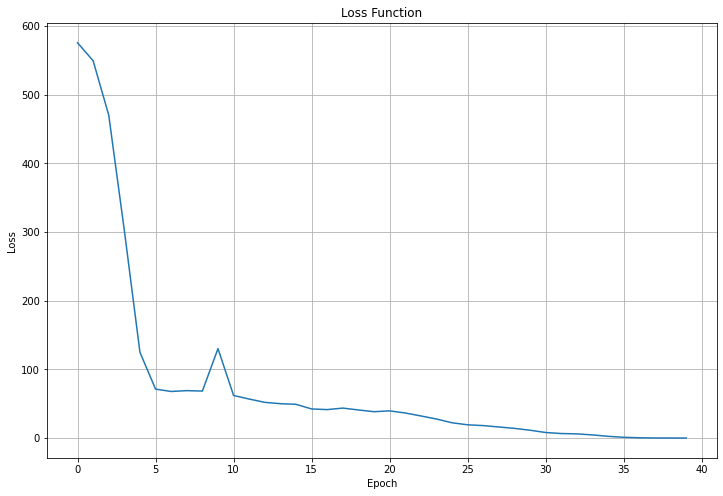

In [123]:
plt.figure(figsize=(12,8))
plt.plot([i['ner'] for i in loss])
plt.grid()
plt.title('Loss Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [124]:
# Save our trained model
link_save_model = "/content/drive/MyDrive/NER_V2.2/NER_v2.2/"
modelfile = input("Enter your Model Name: ")
model.to_disk(link_save_model + modelfile)

Enter your Model Name: model6


# Evaluation

In [125]:
# import package for displaying NER results
from spacy import load, displacy

In [143]:
# import model
link_to_model = "/content/drive/MyDrive/NER_V2.2/NER_v2.2/model4"
loaded_model = load(link_to_model)

In [148]:
test_text = "besok nyambung hujan kasat reskrim polrestabes makassar akbp reonald truly sohomuntal simanjuntak wartawan rekonstruksi kamis 1952022 akbp rheonald rekonstruksi separuh jalan rekonstruksi dilanjutkan lokasi eksekusi pembunuhan korban adegan total 28 adegan akbp rheonald dirangkum rekonstruksi rumah rachma dishub makassar rekonstruksi lokasi memperagakan pertemuan iqbal asnan asri rumah rachma rumah rachma rekonstruksi berlanjut rumah korban jalan sultan alauddin makassar lokasi tersangka asri memperagakan pelemparan santet botol mineral telur rumah korban arahan tersangka iqbal asnan rekonstruksi berlanjut gerbang perumahan korban tersangka chaerul akmal memantau korban sepeda motor rekonstruksi berpindah rumah iqbal asnan jalan beringin timur rappocini makassar rekonstruksi rumah iqbal tertutup awak media diperbolehkan menunggu pagar rumah memiliki halaman luas rekonstruksi berlanjut rumah iqbal jalan andi kumala makassar tempat tersangka asri uang rp 20 juta tersangka sulaiman oknum polisi rekonstruksi berpindah balai kota makassar jalan ahmad yani rekonstruksi lokasi adegan asri menemui tersangka sulaiman lobi balai kota makassar sulaiman asri menghadap ruangan iqbal asnan berbicara iqbal curhat sulaiman istrinya rachma dishub makassar kerap diganggu korban iqbal mengaku berkalikali memperingatkan korban menjaga jarak korban mendekati istrinya iqbal asnan sulaiman mengeksekusi korban suruh eksekusi iqbal asnan teks adegan rekonstruksi sulaiman mengaku berani mengeksekusi korban iqbal lantas sulaiman mencari rekannya brimob polda sulsel chaerul akmal sulaiman meninggalkan ruangan iqbal tersangka asri menemui iqbal iqbal rp 20 juta operasional pembunuhan uang operasional solar satpol makassar uang sulaiman asri arahan iqbal asnan"

In [149]:
doc = loaded_model(test_text)
displacy.render(doc, style="ent", jupyter=True)

In [87]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

rapat 87 92 nama
aipda 165 170 nama
rudi 171 175 nama


In [ ]:
with open('ner.csv', 'w') as file:
    file.writelines('token,entity\n')
    for tok in doc.ents:
        file.writelines(f"{tok.text},{tok.label}\n")

In [ ]:
# PERSON:      People, including fictional.
# NORP:        Nationalities or religious or political groups.
# FAC:         Buildings, airports, highways, bridges, etc.
# ORG:         Companies, agencies, institutions, etc.
# GPE:         Countries, cities, states.
# LOC:         Non-GPE locations, mountain ranges, bodies of water.
# PRODUCT:     Objects, vehicles, foods, etc. (Not services.)
# EVENT:       Named hurricanes, battles, wars, sports events, etc.
# WORK_OF_ART: Titles of books, songs, etc.
# LAW:         Named documents made into laws.
# LANGUAGE:    Any named language.
# DATE:        Absolute or relative dates or periods.
# TIME:        Times smaller than a day.
# PERCENT:     Percentage, including ”%“.
# MONEY:       Monetary values, including unit.
# QUANTITY:    Measurements, as of weight or distance.
# ORDINAL:     “first”, “second”, etc.
# CARDINAL:    Numerals that do not fall under another type.